In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Amazon Foods\Reviews.csv")
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [54]:
df = df.drop(['Id'], axis=1)
df.shape

(568454, 9)

In [55]:
df = df.drop_duplicates()
df.shape

(568173, 9)

Consider only alphabetical words.
Lower case
remove stopwords
Lemmatization


In [56]:
df["HelpfulnessDenominator"].describe()

count    568173.000000
mean          2.229240
std           8.291384
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max         923.000000
Name: HelpfulnessDenominator, dtype: float64

<AxesSubplot:xlabel='HelpfulnessNumerator', ylabel='HelpfulnessDenominator'>

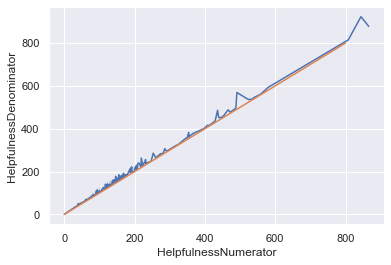

In [59]:
# sns.set_theme(style="darkgrid")
sns.lineplot(data=df, y="HelpfulnessDenominator", x="HelpfulnessNumerator")
sns.lineplot(x=np.linspace(0,800, 10), y=np.linspace(0,800,10), legend=True)


In [60]:
sh = df.shape
df = df.drop_duplicates(subset={"UserId", "Time", "Text"}, keep="first", inplace=False)

In [61]:

(sh[0]-df.shape[0])*100/sh[0]

30.673932059425564

In [62]:
df = df[df.HelpfulnessNumerator<=df.HelpfulnessDenominator]

--------------------------------TEXT Preprocessing------------------------------

In [63]:
df.head()

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [66]:
df = df.drop(["Time", "Summary"], axis=1)

In [67]:
df

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Text
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,I have bought several of the Vitality canned d...
1,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,Product arrived labeled as Jumbo Salted Peanut...
2,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,This is a confection that has been around a fe...
3,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,If you are looking for the secret ingredient i...
4,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...
568449,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,Great for sesame chicken..this is a good if no...
568450,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,I'm disappointed with the flavor. The chocolat...
568451,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,"These stars are small, so you can give 10-15 o..."
568452,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,These are the BEST treats for training and rew...


In [94]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lt = WordNetLemmatizer()
txt = []

In [95]:
for i in df["Text"]:
    word = re.sub('[^a-zA-Z]', ' ', i)    
    word = word.lower()
    word = word.split()

    word = [lt.lemmatize(w) for w in word if not w in stopwords.words('english')]
    word = " ".join(word)
    txt.append(word)

In [96]:
# # print(type(df["Text"][29]))
# print("------")
# # print(df["Text"][29])
# print("---------")
# # print(re.sub('[^a-zA-Z]', ' ', df['Text'][29]))
# # print(len(df))
# df.head(30)
# df.reindex().head(30)
i

'I am very satisfied ,product is as advertised, I use it on cereal, with raw vinegar, and as a general sweetner.'

In [97]:
def senti(x):
    if x<3:
        return 0
    else:
        return 1

In [103]:
temp = df["Score"]
temp2 = temp.map(senti)
df["Score"] = temp2

In [105]:
del temp2
del temp

In [109]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500)

In [110]:
X = cv.fit_transform(txt).toarray()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, Y_train, Y_test = train_test_split(X, df["Score"], test_size=.33, random_state=0)

model = MultinomialNB().fit(X_train, y_train)

In [ ]:
pred = model.predict(X_test)